In [10]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.aqua.circuits import FourierTransformCircuits as ftc
%run qft2.ipynb #for importing ccx function

In [11]:
n = 2
coin = 1
classic = 3
qreg = QuantumRegister(n)
qcoin = QuantumRegister(coin)
qclass = ClassicalRegister(classic)


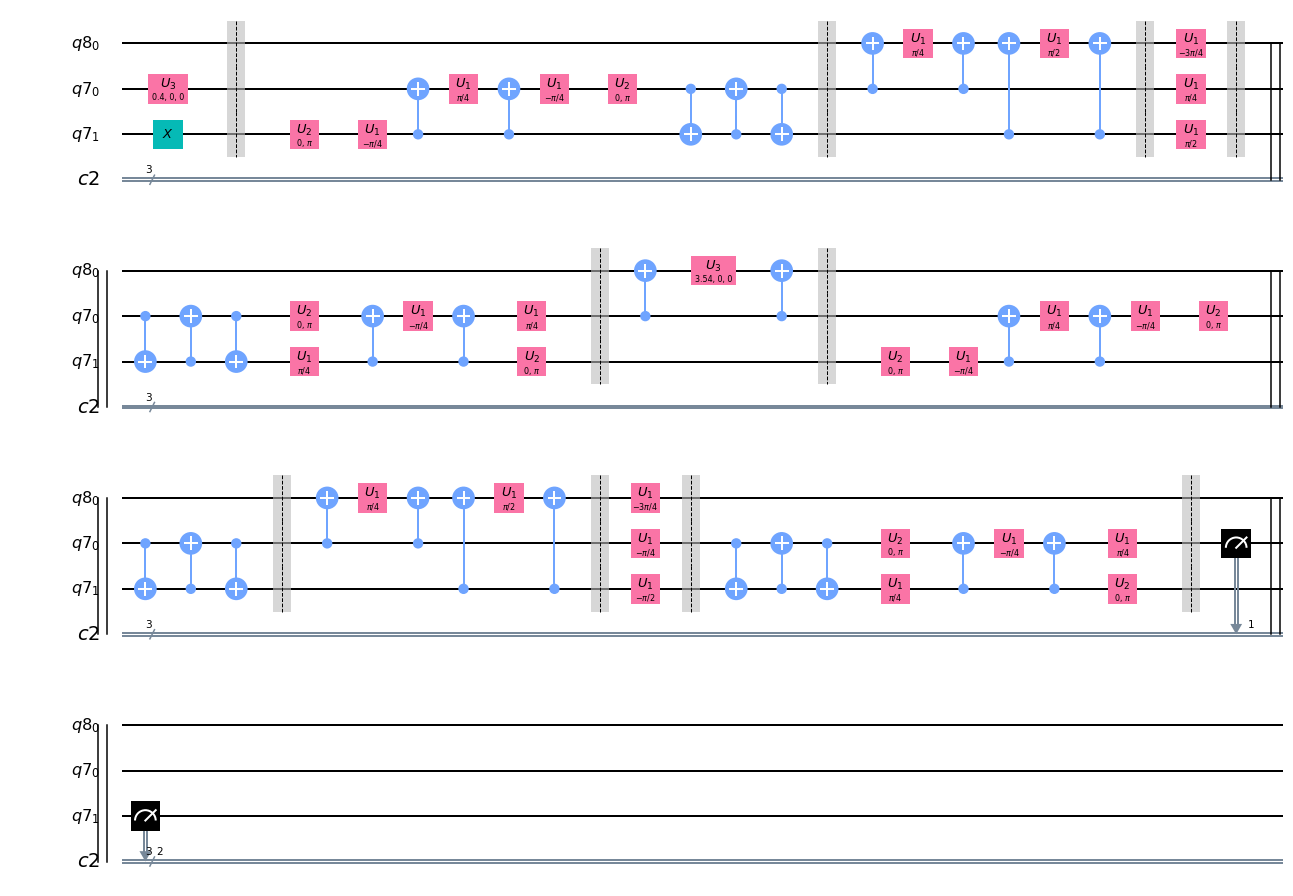

In [42]:
qw = QuantumCircuit(qcoin,qreg,qclass)

qw.x(qreg[1])
qw.u3(0.4,0,0,qreg[0])

qw.barrier()
ftc.construct_circuit(qw,qreg,inverse=True)
qw.barrier()


qw.cx(qreg[0],qcoin[0])
qw.u1(pi/4,qcoin[0])
qw.cx(qreg[0],qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.u1(pi/2,qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.barrier()
qw.u1(-3*pi/4,qcoin[0])
qw.u1(pi/4,qreg[0])
qw.u1(pi/2,qreg[1])

qw.barrier()
ftc.construct_circuit(qw,qreg)
qw.barrier()

qw.cx(qreg[0],qcoin[0])
qw.u3(pi+0.4,0,0,qcoin[0])
qw.cx(qreg[0],qcoin[0])

                      
qw.barrier()
ftc.construct_circuit(qw,qreg,inverse=True)
qw.barrier()

qw.cx(qreg[0],qcoin[0])
qw.u1(pi/4,qcoin[0])
qw.cx(qreg[0],qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.u1(pi/2,qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.barrier()
qw.u1(-3*pi/4,qcoin[0])
qw.u1(-pi/4,qreg[0])
qw.u1(-pi/2,qreg[1])

qw.barrier()
ftc.construct_circuit(qw,qreg)
qw.barrier()


#qw.measure(qcoin[0],0)
qw.measure(qreg[0],1)
qw.measure(qreg[1],2)


qw.draw(output='mpl')

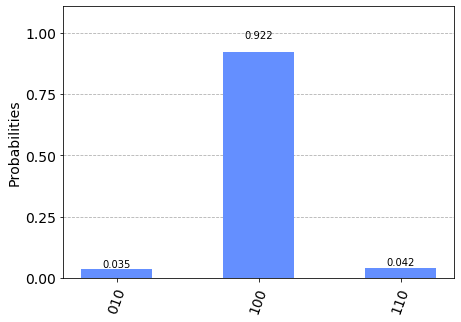

In [43]:
backend = Aer.get_backend('qasm_simulator')
shots = 8000
results = execute(qw, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

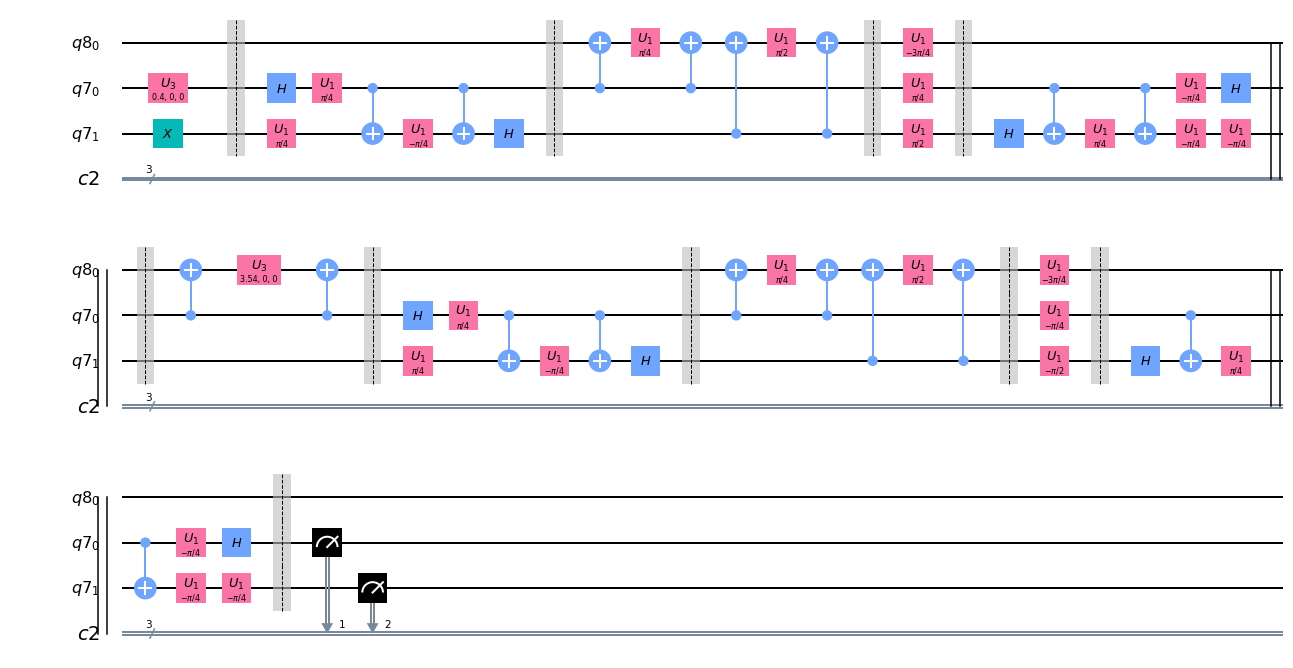

In [44]:
qw = QuantumCircuit(qcoin,qreg,qclass)

qw.x(qreg[1])
qw.u3(0.4,0,0,qreg[0])

qw.barrier()
qw.h(qreg[0])
qw.u1(pi/4,qreg)
qw.cx(qreg[0],qreg[1])
qw.u1(-pi/4,qreg[1])
qw.cx(qreg[0],qreg[1])
qw.h(qreg[1])
qw.barrier()


qw.cx(qreg[0],qcoin[0])
qw.u1(pi/4,qcoin[0])
qw.cx(qreg[0],qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.u1(pi/2,qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.barrier()
qw.u1(-3*pi/4,qcoin[0])
qw.u1(pi/4,qreg[0])
qw.u1(pi/2,qreg[1])

qw.barrier()
qw.h(qreg[1])
qw.cx(qreg[0],qreg[1])
qw.u1(pi/4,qreg[1])
qw.cx(qreg[0],qreg[1])
qw.u1(-pi/4,qreg[1])
qw.u1(-pi/4,qreg)
qw.h(qreg[0])
qw.barrier()

qw.cx(qreg[0],qcoin[0])
qw.u3(pi+0.4,0,0,qcoin[0])
qw.cx(qreg[0],qcoin[0])

                      
qw.barrier()
qw.h(qreg[0])
qw.u1(pi/4,qreg)
qw.cx(qreg[0],qreg[1])
qw.u1(-pi/4,qreg[1])
qw.cx(qreg[0],qreg[1])
qw.h(qreg[1])
qw.barrier()

qw.cx(qreg[0],qcoin[0])
qw.u1(pi/4,qcoin[0])
qw.cx(qreg[0],qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.u1(pi/2,qcoin[0])
qw.cx(qreg[1],qcoin[0])
qw.barrier()
qw.u1(-3*pi/4,qcoin[0])
qw.u1(-pi/4,qreg[0])
qw.u1(-pi/2,qreg[1])

qw.barrier()
qw.h(qreg[1])
qw.cx(qreg[0],qreg[1])
qw.u1(pi/4,qreg[1])
qw.cx(qreg[0],qreg[1])
qw.u1(-pi/4,qreg[1])
qw.u1(-pi/4,qreg)
qw.h(qreg[0])
qw.barrier()


#qw.measure(qcoin[0],0)
qw.measure(qreg[0],1)
qw.measure(qreg[1],2)


qw.draw(output='mpl')

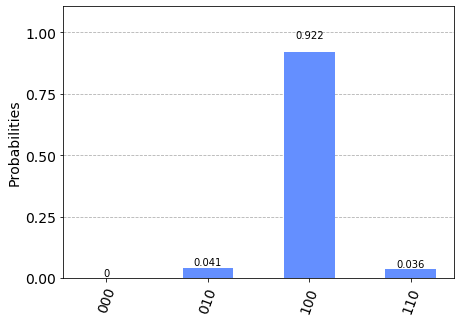

In [45]:
backend = Aer.get_backend('qasm_simulator')
shots = 8000
results = execute(qw, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)